In [25]:
import pandas as pd
import re 
import string


import pandas as pd
import sqlite3
conn = sqlite3.connect("reviews.db")
df = pd.read_sql_query("SELECT * FROM reviews_tb", conn)
df["patient_reviews"][0]





'[\'I saw Dr Poulin for port removal. He is an excellent, professional, highly experienced physician who took time to listen to my concerns and explained everything very carefully and performed the procedure skilfully and kept my family informed throughout the peri-operative period. his office staff was excellent. I was able to get the appointment within a week and received a follow-up call and clear post-operative instructions. Usha South Bend\', \'My care and treatment are excellent\', \'A truly knowledgeable caring, concerned, compassionate individual, who I am grateful to have experienced as a surgical physician. This demeanor is apparent throughout his office and surgical staff. I am, and we are fortunate to have he and his staff in our community serving patients throughout. \', \'Excellent doctor. Always early and or on time. Takes time to answer questions. We are so fortunate to have Dr Poulin as a physician. \', "Dr Poulin is an excellent Surgeon - he takes care of both my husb

# Cleaning the Data


In [36]:
import re
import string


def clean_text_basics(text):
    
    text = text.lower()
    text = re.sub('\[', '', text)
    text =re.sub('\]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\w*\d\w*', '', text)
    return text

clean = lambda x: clean_text_basics(x)
def clean_doc(text):
    text = re.sub('\[', '', text)
    text =re.sub('\]', '', text)
    text = re.sub("\'", "", text)
    return text

df["patient_reviews"]= pd.DataFrame(df["patient_reviews"].apply(clean))
df['doctor']= pd.DataFrame(df["doctor"].apply(clean_doc))
df["patient_reviews"]

0    i saw dr poulin for port removal he is an exce...
1    he did a good csection but brushed off concern...
2    i recently had my appointment with dr credit p...
3                                                     
4    great i am impressed with the minimal amount o...
5    i have worked a nurse for  years in this area ...
Name: patient_reviews, dtype: object

In [37]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df["polarity"] = df["patient_reviews"].apply(pol)
df["subjectivity"] = df["patient_reviews"].apply(sub)
df

,doctor,patient_reviews,polarity,subjectivity
0,"Dr. Thomas Poulin, MD",i saw dr poulin for port removal he is an exce...,0.389379,0.561928
1,"Dr. Douglas MacGregor, DO",he did a good csection but brushed off concern...,-0.056250,0.416667
2,"Dr. Robert Credi, MD",i recently had my appointment with dr credit p...,0.099061,0.492063
3,"Dr. Alfredo Casetti, MD",,0.000000,0.000000
4,"Dr. Charles Peterson, MD",great i am impressed with the minimal amount o...,0.352517,0.529408
5,"Dr. Timothy Noveroske, MD",i have worked a nurse for years in this area ...,0.361721,0.595987


In [54]:
df.set_index(df["doctor"], inplace = True)
#df.drop("Dr. Alfredo Casetti, MD", inplace = True)

In [41]:
#got from https://www.indianapcf.com/Provider-ClaimSummaryList.aspx

df["claims"] = [13,1,12,0,15]


In [42]:
df["yrs"]=[24,41,44,30,43]

In [43]:
df["claims/yr"]= df["claims"]/df["yrs"]
df

,doctor,patient_reviews,polarity,subjectivity,claims,yrs,claims/yr
doctor,,,,,,,
"Dr. Thomas Poulin, MD","Dr. Thomas Poulin, MD",i saw dr poulin for port removal he is an exce...,0.389379,0.561928,13,24,0.541667
"Dr. Douglas MacGregor, DO","Dr. Douglas MacGregor, DO",he did a good csection but brushed off concern...,-0.056250,0.416667,1,41,0.024390
"Dr. Robert Credi, MD","Dr. Robert Credi, MD",i recently had my appointment with dr credit p...,0.099061,0.492063,12,44,0.272727
"Dr. Charles Peterson, MD","Dr. Charles Peterson, MD",great i am impressed with the minimal amount o...,0.352517,0.529408,0,30,0.000000
"Dr. Timothy Noveroske, MD","Dr. Timothy Noveroske, MD",i have worked a nurse for years in this area ...,0.361721,0.595987,15,43,0.348837


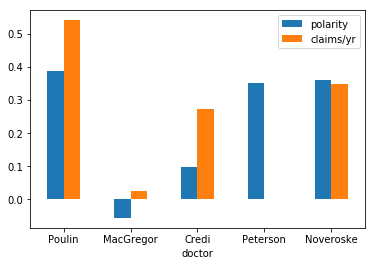

In [58]:
import matplotlib.pyplot as plt

df.rename(index = {"Dr. Thomas Poulin, MD":"Poulin", "Dr. Douglas MacGregor, DO":"MacGregor", "Dr. Robert Credi, MD":"Credi",
                   "Dr. Charles Peterson, MD":"Peterson", "Dr. Timothy Noveroske, MD":"Noveroske"}, inplace= True)
ax = df.plot.bar( y = ['polarity','claims/yr'], rot =0)

